# Introduction To Regression With Neural Networks in TensorFlow

In [1]:
import tensorflow as tf

tf.__version__

'2.10.0'

## Creating The Data and Features

In [2]:
import numpy as np
import matplotlib.pyplot as plt

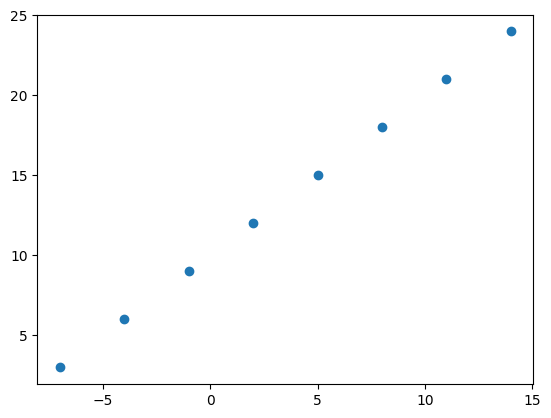

In [3]:
# Creating the data
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Creating the labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Plotting the thing
plt.scatter(X, y)

In [4]:
# Turning np arrays to tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [5]:
inputShape = X[0].shape
outputShape = y[0].shape

inputShape, outputShape

(TensorShape([]), TensorShape([]))

## Steps In modelling with TensorFlow

1. **Creating A Model** :-
    - define the input and output laters
    - define the hidden layers
2. **Compiling A Model** :- 
    - define the loss function (the function which tells our model how wrong it is)
    - define the optimizer (the function which tells our model how to improve the patterns it's larning)
    - evaluation metrics (what we can use to interpret the performacne of our model)
3. **Fitting A Model** :-
    - letting the model to try and find patterns between `X` and `y` or (features and labels)_

In [6]:
# Setting the random seed
tf.random.set_seed(38)

# 1. Creating a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(
  loss=tf.keras.losses.mae, # mean absolute error
  optimizer=tf.keras.optimizers.SGD(), # schocastic gradient descent
  metrics=['mae']
)

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 613ms/step - loss: 12.3561 - mae: 12.3561
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 12.2236 - mae: 12.2236
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 12.0911 - mae: 12.0911
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.9586 - mae: 11.9586
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 11.8261 - mae: 11.8261


In [7]:
# Relationship between X and y is y = X + 10

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
# Predicting the values
model.predict([17.0])

1/1 [==============================] - 0s 166ms/step


array([[8.581147]], dtype=float32)

## Improving Our Model

The steps that we can follow to improve our model and it's predictions are :- 
1. **Creating the model** - 
    - Increase the number of layers
    - Increase the number of hidden units (also called neurons) within the hidden layers
    - change the activation function of each layer
2. **Compiling the model** -
    - changing the optimization function
    - changing the learning rate of the model
3. **Fitting the model** - 
    - change the number of epochs (fitting the data for longer time)
    - give the model more data to train on


In [9]:
# Let's rebuild the model. But this time, change the epochs only

# 1. Creating the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(
  optimizer=tf.optimizers.SGD(),
  loss=tf.keras.metrics.mae,
  metrics=['mae']
)

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 386ms/step - loss: 12.2010 - mae: 12.2010
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.0685 - mae: 12.0685
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9360 - mae: 11.9360
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8035 - mae: 11.8035
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.6710 - mae: 11.6710
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.5385 - mae: 11.5385
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 11.4060 - mae: 11.4060
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2735 - mae: 11.2735
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1410 - mae: 11.1410
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0085 - mae: 11.0085
Epoch 11/100
1/1 [==============================] - 0s 8

In [11]:
# Prediction
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[29.764275]], dtype=float32)

In [12]:
# Making some other change to get better predictions

# 1. Creating the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(
  loss=tf.keras.losses.mae,
  metrics=["mae"],
  optimizer=tf.keras.optimizers.SGD()
)

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 471ms/step - loss: 14.1780 - mae: 14.1780
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.6654 - mae: 13.6654
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.1643 - mae: 13.1643
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6692 - mae: 12.6692
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1910 - mae: 12.1910
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7059 - mae: 11.7059
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2068 - mae: 11.2068
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6915 - mae: 10.6915
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1564 - mae: 10.1564
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6005 - mae: 9.6005
Epoch 11/100
1/1 [==============================] - 0s 8ms/

In [13]:
# Predicting the data
model.predict([17.0])

1/1 [==============================] - 0s 98ms/step


array([[32.055916]], dtype=float32)